In [1]:
1

1

In [13]:
import torch 
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [14]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [15]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

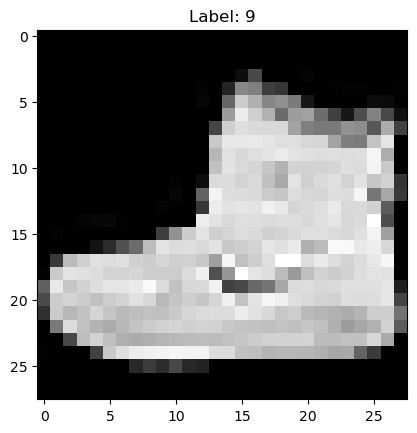

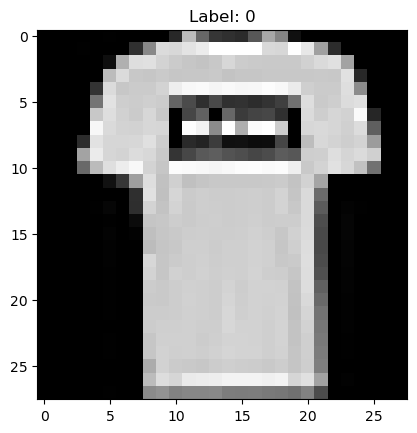

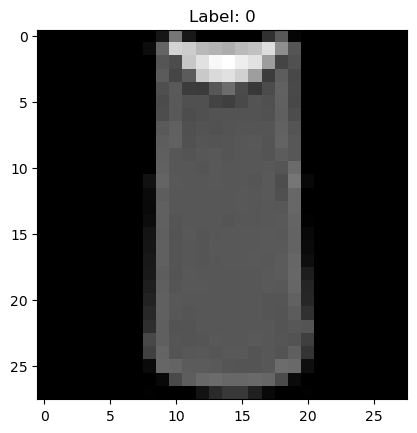

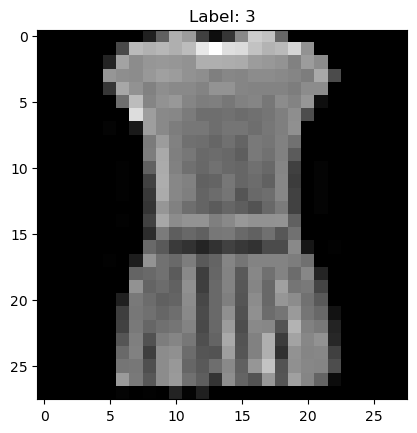

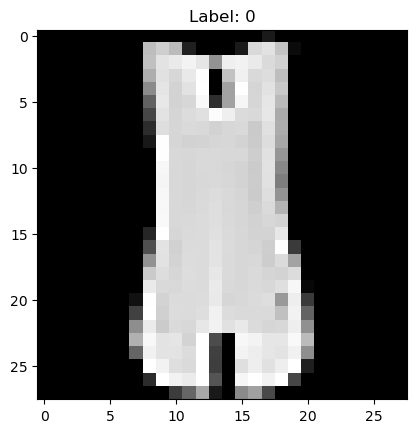

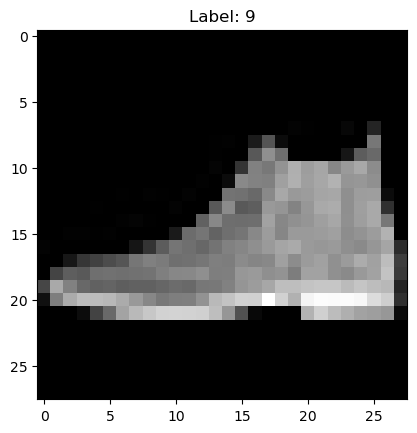

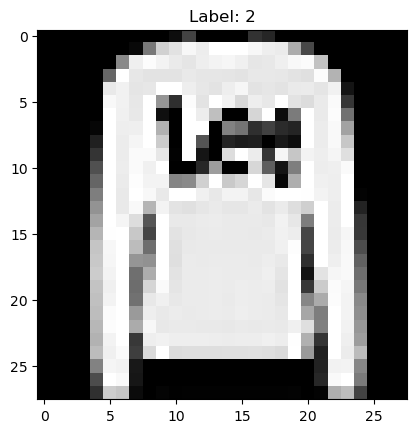

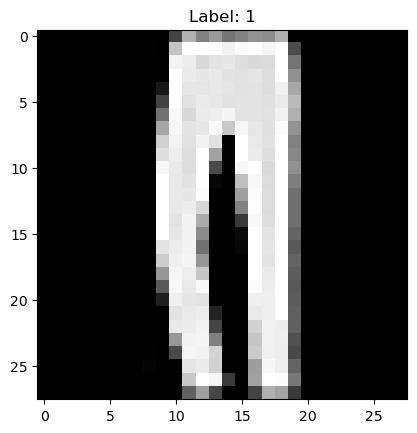

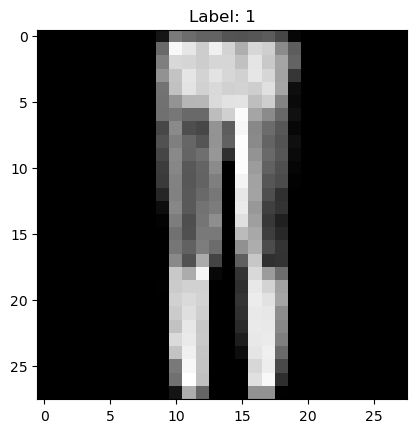

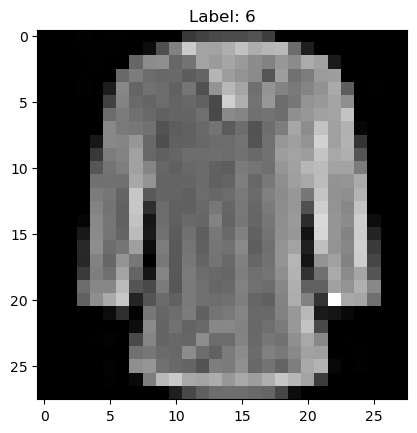

In [16]:
import matplotlib.pyplot as plt

# Function to show an image
def show_image(img, label):
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Label: {label}")
    plt.show()

# Display a few training images
for i in range(5):
    img, label = training_data[i]
    show_image(img, label)

# Display a few test images
for i in range(5):
    img, label = test_data[i]
    show_image(img, label)

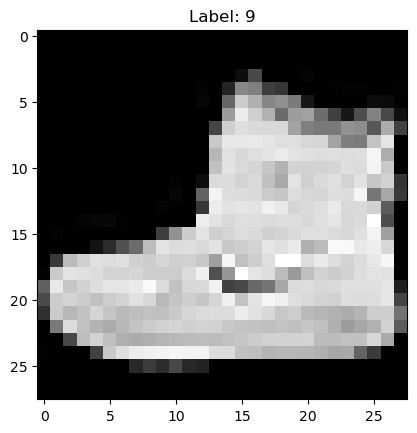

In [21]:
show_image(training_data[0][0], training_data[0][1])

In [22]:
device = "cuda" if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else "cpu"

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [23]:
model = NeuralNetwork().to(device)

In [25]:
training_data[0][0].shape

torch.Size([1, 28, 28])

In [27]:
training_data[0][0].numpy()

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [37]:
# create a random linear layer
linear = nn.Linear(28*28, 512)
print(f"Weight shape: {linear.weight.shape}, bias shape: {linear.bias.shape}; weights seem randomly initialized")
linear.weight

Weight shape: torch.Size([512, 784]), bias shape: torch.Size([512]); weights seem randomly initialized


Parameter containing:
tensor([[ 0.0240, -0.0046, -0.0245,  ..., -0.0255, -0.0269, -0.0209],
        [ 0.0194, -0.0080, -0.0147,  ..., -0.0032, -0.0190,  0.0231],
        [ 0.0302,  0.0309,  0.0221,  ..., -0.0158, -0.0272,  0.0334],
        ...,
        [-0.0323,  0.0034, -0.0016,  ..., -0.0239,  0.0357,  0.0211],
        [ 0.0194, -0.0309,  0.0258,  ..., -0.0214, -0.0147,  0.0200],
        [ 0.0023, -0.0126, -0.0323,  ...,  0.0139,  0.0169, -0.0214]],
       requires_grad=True)

In [50]:
linear(test_data[0][0].reshape(-1, 28*28))


tensor([[ 1.1206e-01,  1.2272e-01,  1.4061e-01, -2.7402e-01,  7.8084e-02,
          3.8870e-01,  1.7695e-02, -1.4147e-01, -1.0463e-02,  1.2769e-01,
          7.3017e-02, -2.0968e-01, -1.7528e-02,  2.3356e-01,  8.4877e-02,
         -4.8617e-02,  2.2658e-01, -1.1877e-04,  7.1548e-02,  1.0844e-01,
          1.9981e-02, -1.5991e-01, -2.0010e-01, -6.4122e-02,  6.4545e-02,
          8.3978e-03,  3.8681e-01,  1.2024e-01,  2.8455e-01,  5.4092e-03,
         -1.8620e-01,  1.7229e-01,  1.7642e-01, -2.3114e-01,  2.5731e-01,
          1.4184e-01, -7.7003e-02, -3.9017e-01, -1.1991e-01, -1.3105e-01,
          4.6726e-04, -1.1982e-01,  1.0576e-01,  1.2800e-01,  1.3182e-01,
          2.5021e-01, -1.1332e-01, -1.5240e-01, -1.2065e-01,  2.7420e-01,
         -7.9367e-02,  4.2102e-02, -5.6509e-02, -1.7613e-01, -9.0370e-02,
         -2.5980e-02,  6.9301e-02, -2.8993e-02, -3.2284e-02, -9.8003e-02,
          5.4746e-02, -4.2321e-02, -1.3938e-01, -2.4863e-01,  2.2318e-01,
          3.9900e-02,  5.0181e-02, -2.

In [57]:
seq_wrong_dimensions=nn.Sequential(
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)

In [61]:
model = NeuralNetwork().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [63]:
training_data[0]


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [75]:
training_data[0][1]

9

In [82]:
X,y=next(iter(train_dataloader))
X,y=X.to(device),y.to(device)

In [ ]:
pred = model(X)
print(f"{pred.shape=},{pred=}")
loss = loss_fn(pred, y)
print(f"{loss=},{torch.sum(loss)=}")
loss.backward()
params = model.parameters()
print(f"{len(list(model.parameters()))=}") 
for param in params:
    print(f"{param.shape=},{param.grad[0]=}, {param._values}")

optimizer.step()
optimizer.zero_grad()

print("gradient after step:")
for param in model.parameters():
    print(f"{param.grad=}")




pred.shape=torch.Size([64, 10]),pred=tensor([[1.8308e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.6958e-02,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 9.8281e-01],
        [6.7685e-01, 1.4528e-01, 0.0000e+00, 3.4722e-01, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 8.2242e-02],
        [2.0424e-01, 2.1386e-01, 0.0000e+00, 2.7514e-01, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.2905e-01, 1.8689e-01, 0.0000e+00, 2.8797e-01, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.7954e-01, 3.6831e-01, 0.0000e+00, 5.2379e-01, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 9.1485e-03],
        [2.2388e-01, 1.9248e-02, 0.0000e+00, 8.9506e-02, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 9.6343e-02],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 8.7954e-03, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 2.3

In [102]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [97]:
params = model.parameters()
print(f"{len(list(model.parameters()))=}") 
for param in params:
    print(f"{param.shape=},{param.grad[0]=}")




len(list(model.parameters()))=6
param.shape=torch.Size([512, 784]),param.grad[0]=tensor([ 0.0000e+00,  0.0000e+00, -7.9686e-08,  1.5772e-07,  1.4620e-07,
         5.6789e-09, -6.5824e-08, -7.7538e-05, -2.5039e-04, -2.8186e-04,
        -1.2168e-04, -1.1131e-04,  7.2628e-05,  1.2355e-04,  1.1267e-04,
         2.6417e-04,  1.0855e-04, -2.3377e-04, -2.0271e-04, -1.6777e-04,
        -9.6517e-05, -2.3654e-05, -2.7010e-05, -2.3865e-05, -5.3866e-06,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00, -1.9254e-06,  1.4358e-07, -1.0222e-04, -4.8217e-04,
        -4.8144e-04, -3.3311e-04,  5.6063e-05,  1.7939e-04,  1.1238e-05,
         1.7286e-04, -2.0700e-04, -4.7820e-05,  5.2154e-05, -2.3089e-04,
        -1.9380e-04, -9.5550e-05, -2.1132e-04, -5.5775e-04, -7.0060e-04,
        -2.3444e-04, -1.2428e-04, -8.5885e-05, -6.5489e-07, -3.4985e-07,
         0.0000e+00,  0.0000e+00,  0.0000e+00, -4.8046e-06,  7.1663e-07,
        -1.6830e-04, -7.4137e-04, -8.1998e-

In [76]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        print(f"""batch: {batch=}, X.shape: {X.shape=}, y.shape: {y.shape=}""")
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [77]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
batch: batch=0, X.shape: X.shape=torch.Size([64, 1, 28, 28]), y.shape: y.shape=torch.Size([64])
loss: 2.246032  [   64/60000]
batch: batch=1, X.shape: X.shape=torch.Size([64, 1, 28, 28]), y.shape: y.shape=torch.Size([64])
batch: batch=2, X.shape: X.shape=torch.Size([64, 1, 28, 28]), y.shape: y.shape=torch.Size([64])
batch: batch=3, X.shape: X.shape=torch.Size([64, 1, 28, 28]), y.shape: y.shape=torch.Size([64])
batch: batch=4, X.shape: X.shape=torch.Size([64, 1, 28, 28]), y.shape: y.shape=torch.Size([64])
batch: batch=5, X.shape: X.shape=torch.Size([64, 1, 28, 28]), y.shape: y.shape=torch.Size([64])
batch: batch=6, X.shape: X.shape=torch.Size([64, 1, 28, 28]), y.shape: y.shape=torch.Size([64])
batch: batch=7, X.shape: X.shape=torch.Size([64, 1, 28, 28]), y.shape: y.shape=torch.Size([64])
batch: batch=8, X.shape: X.shape=torch.Size([64, 1, 28, 28]), y.shape: y.shape=torch.Size([64])
batch: batch=9, X.shape: X.shape=torch.Size([64, 1, 28, 28]), y.sh

NameError: name 'test' is not defined

In [60]:
seq_wrong_dimensions(test_data[0][0].reshape(-1, 28*28))

tensor([[ 0.0395,  0.0381, -0.0271,  0.0255, -0.0646,  0.0593,  0.0295,  0.0445,
          0.0159, -0.0028]], grad_fn=<AddmmBackward0>)

# Second tutorial- tensors

In [105]:
import torch  
import numpy as np
data = [[1, 2],[3, 4]]

np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_ones = torch.zeros_like(x_np)+1.0

shape =(2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)


In [108]:
if torch.cuda.is_available():
    print("CUDA is available")
    device=torch.device('cuda')
elif torch.backends.mps.is_available():
    print("MPS is available")
    device=torch.device('mps')
else:
    device=torch.device('cpu')
    print("CUDA and MPS are not available")
ones_tensor.to(device)

MPS is available


tensor([[1., 1., 1.],
        [1., 1., 1.]], device='mps:0')

# random vector operations

In [112]:
t1 = torch.cat([ones_tensor, ones_tensor], dim=0)
t1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [113]:
t1@t1.T

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

datasets and dataloaders
datalader and datasest

torch.utils.data  





basics of autograd

In [114]:
import torch
from torchvision.models import resnet18, ResNet18_Weights

model = resnet18(weights = ResNet18_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/stefanpetrov/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100.0%


In [115]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [134]:
random_input = torch.rand((1, 3, 64,64))
prediction = model(random_input)
random_output = torch.rand((1, 1000))

In [144]:
for _ in range(100):
    optimizer.zero_grad()
    prediction = model(random_input)
    loss = (prediction - random_output).sum()
    loss.backward()
    prediction = model(random_input)


In [ ]:
optimizer.zero_grad()
loss = (prediction - random_output).sum()
print(f"{loss=}")
loss.backward() # backward pass?
print("{list(model.parameters())[0].grad.shape}")

# Compute the Hessian (second derivatives)
hessian = torch.autograd.functional.hessian(lambda x: (model(x) - random_output).sum(), random_input)
print(f"Hessian shape: {hessian.shape}")
optimizer.step()

loss=tensor(-496.4420, grad_fn=<SumBackward0>)


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [147]:
hessian = torch.autograd.functional.hessian(lambda x: (model(x) - random_output).sum(), random_input)


KeyboardInterrupt: 

In [ ]:
x = torch.randn(5, requires_grad=)
y = x.exp()
# print(x.equal(y.grad_fn._saved_self))  # True
# print(x is y.grad_fn._saved_self)  # True

In [158]:
y.grad_fn._saved_result

tensor([0.8118, 1.6407, 4.1882, 0.2796, 2.3582], grad_fn=<ExpBackward0>)

In [159]:
y

tensor([0.8118, 1.6407, 4.1882, 0.2796, 2.3582], grad_fn=<ExpBackward0>)

In [182]:
from torch.func import hessian,jacfwd as jacobian,jacrev
def f(x):
  return x.sin()
x = torch.randn(5)
jac = jacrev(f)(x)  # equivalent to jacfwd(jacrev(f))(x)
jac  
# assert torch.allclo?se(he?ss, torch.diag(-x.sin()))

tensor([[0.8215, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9584, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.4122, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.9589, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.7959]])